# 收益率和指数的计算


+ 具体计算的方法我们在第五讲  和第六讲中都有所涉及，这里再重温这些技术细节并介绍一些更详细的内容。

+ 在金融市场中，收益率是用来衡量投资收益的最重要的指标。收益率越高，说明每单位本金的投资获得的收益越高。

+ 需要注意，虽然严格的收益率计算和时间有关，我们通常会进行时间处理，比如做年化处理。不过如果分析数据的目的是发现数据中的规律，比如发现高收益策略，则收益率的计算只要保持一致就行，不一定需要进行时间的换算。

+ 实际的宏观经济或金融市场都特别复杂，常常需要发展一些指数来描述经济或市场的现状。比方大家熟悉的CPI，GDP, 上证指数等等，都为我们从不同角度了解经济或金融市场提供一种简单的途径。

+ 这一讲主要介绍金融市场中证券收益率以及各种指数的计算和展示。

+ 首先我们介绍收益率及其计算。 

## 收益率

### 净收益率(net returns)

$P_t$表示$t$ 时刻资产的价格，如果期间没有**股息**收入，则从$t-1$ 时刻持有到$t$ 时刻，投资者获得的净收益率为：

$${R_t} = \frac{{{P_t}}}{{{P_{t - 1}}}} - 1 = \frac{{{P_t} - {P_{t - 1}}}}{{{P_{t - 1}}}}$$

其中${P_t} - P_{t - 1}$ 表示投资者在持有期所获得的利润，如果其为负值在表示在期间投资者亏损了。 $P_{t - 1}$ 表示持有期的初始投资。因此，简单收益率实际是刻画相对利润。 并且，持有某项资产获得的利润可以表示为

                                      利润=初始投资 × 净收益率

比如，初始投资为10000元，净收益率为10%，在期间利润为1000元。

###  连续复合收益率（continuously compounded returns）也称 对数收益率(log returns)

定义如下：
  
  $${r_t} = \ln \left( {1 + {R_t}} \right) = \ln \left( {\frac{{{P_t}}}{{{P_{t - 1}}}}} \right) = \ln({P_t}) -\ln({P_{t - 1}}) = {p_t} - {p_{t - 1}}$$
  
  其中$p_t=\ln (P_t)$ 被称为对数价格。
  

  在金融数据分析中，我们**常常用对数收益率代替收益率(投资组合风险除外)**，则有几个原因。
  
 1. 在通常情形下，简单收益率和对数收益率差别不大。
 2. 对数收益率有一些比较易于分析的条件。比如，取值范围，分布假设，我们会在后面做进一步的分析。
 

下面先看看简单收益率和对数收益率在相同情况下的差距。

通常我们知道 两者有如下关系：

$$r_t=\ln(1+R_t)$$

我们计算净收益率从-20%到20%时两者差距。其中注意python中的map和plot用法。

In [1]:
res

NameError: name 'res' is not defined

In [4]:
import numpy as np
import pandas as pd
R=np.arange(-0.2,0.21,0.02)
print(R)
r=np.log(1+R);Rrdiff=R-r
res=[R,r,Rrdiff]
res=pd.DataFrame(res,index=["SimpleRet","LogRet","Diff"],columns=R.round(2))
res[res.columns[np.arange(0,21,4)]] 

[ -2.00000000e-01  -1.80000000e-01  -1.60000000e-01  -1.40000000e-01
  -1.20000000e-01  -1.00000000e-01  -8.00000000e-02  -6.00000000e-02
  -4.00000000e-02  -2.00000000e-02  -1.11022302e-16   2.00000000e-02
   4.00000000e-02   6.00000000e-02   8.00000000e-02   1.00000000e-01
   1.20000000e-01   1.40000000e-01   1.60000000e-01   1.80000000e-01
   2.00000000e-01]


,-0.2,-0.12,-0.04,0.04,0.12,0.2
SimpleRet,-0.200000,-0.120000,-0.040000,0.040000,0.120000,0.200000
LogRet,-0.223144,-0.127833,-0.040822,0.039221,0.113329,0.182322
Diff,0.023144,0.007833,0.000822,0.000779,0.006671,0.017678


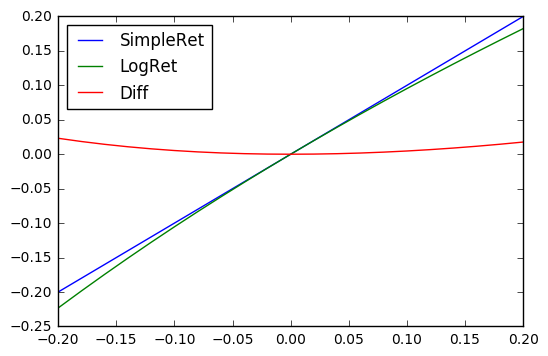

In [5]:
%matplotlib inline 
res.T.plot()

+ 注意这里DataFrame数据的plot方法以index为三个曲线共同的横坐标

### 不同频率的收益率计算。

+ 计算资产收益率有不同的类型，比如分析高频数据时，我们可能需要计算１分钟、５分钟、１０分钟、１５分钟、半小时等不同市场的收益率。
+ 在分析较长期的数据时，我们可能会关注日收益率、周收益率、月收益率、季度收益率、年收益率等。
+ 通常我们能得到的数据是分时数据（比如ｓｉｎａ的每五秒的汇总数据），或者日线数据。我们需要从这些类型的数据来计算自己需要的收益率。

利用第五讲 （时间序列) 中的resample函数就可以得到相应的收益率。

1. 如果从价格数据计算收益率，我们可以直接取出相应频率的数据进行然后在进行收益率计算。
2. 如果从收益率数据出发，则需要讨论收益率的类型。当收益率为对数收益率时，问题比较简单，只需要利用resample函数同时进行取样和汇总(sum)即可.
+ 在给出代码示例之前，我们稍微分析一下第2点。

+ 对于对数收益率，我们有结论：

**多期对数收益率是单期对数收益率之和**

+ 设$r_t,R_t$为$t-1$时刻到$t$时刻对数收益率和简单收益率，$r_t(k),R_t(k)$为$t-k$时刻到$t$时刻对数收益率和简单收益率，则

$\begin{array}{rl}
{r_t}\left( k \right) &= \log \left( {1 + {R_t}\left( k \right)} \right)\\
 &= \log \left\{ {\left( {1 + {R_t}} \right) \cdots \left( {1 + {R_{t - k + 1}}} \right)} \right\}\\
 &= \log \left( {1 + {R_t}} \right) +  \cdots  + \log \left( {1 + {R_{t - k + 1}}} \right)\\
 &= {r_t} + {t_{t - 1}} +  \cdots  + {r_{t - k + 1.}}
\end{array}$

+ 显然，多期简单收益率和单期简单收益率的关系为：

 $$ {1 + {R_t}\left( k \right)}  =  \left( {1 + {R_t}} \right) \cdots\left( {1 + {R_{t - k + 1}}} \right)$$
 
+ 下面我们计算一下

In [6]:
%cd  E:\kuaipan\2016aut\notebook\data
HighF=pd.read_csv("highf.csv",encoding="gbk",index_col=1,parse_dates=True)
HighF=HighF.ix[range(len(HighF)-1,-1,-1)]
Hprice=HighF["price"]

Shindex=pd.read_csv("sh000001.csv",index_col=0,parse_dates=True)
Dprice=Shindex["close"]

[Errno 2] No such file or directory: 'E:kuaipan2016autnotebookdata'
/Users/wrk/Documents/notebook0


OSError: File b'highf.csv' does not exist

In [ ]:
HighF.ix[:5]

In [ ]:
Shindex.ix[:5] 

+ 下面我们对高频数据 进行 5分钟收益率的计算

In [ ]:
#先抽样，再计算
from  math  import log
res1=Hprice.resample("5min").last()
#简单收益率
return1=res1.pct_change()
 

# 对数收益率
res2= res1.map(log)
return2=res2-res2.shift(1)
 

In [ ]:
print(res1[:3])
print( "验证：(4.44-4.46)/4.46=",(4.44-4.46)/4.46)
print( "验证：log(4.44)-log(4.46)=",log(4.44)-log(4.46))

ret=pd.concat([return1,return2],axis=1)
ret.columns=["SimpleReturn5min","LogReturn5min"]
ret.ix[:5]

+ 如何通过五分钟简单收益率计算十分钟对数收益率呢？

+ 下面我们利用日线数据，进行周收益率的计算。
   - 收益率的计算

In [ ]:
SimpleReturnDaily=Dprice.pct_change()
logp=Dprice.map(log)
LogReturnDaily=logp-logp.shift(1)

+ 
  - 周收益率

In [ ]:
PriceFri=Dprice.resample("W-FRI").last()
SimpleReturnWeek=PriceFri.pct_change()
logpw=PriceFri.map(log)
LogReturnWeekly=logpw-logpw.shift(1)

+ 
   - 从日对数收益率计算周对数收益率

In [ ]:
LogReturnWeekly1=LogReturnDaily.resample("W-FRI").sum()

res=pd.concat([SimpleReturnWeek,LogReturnWeekly,LogReturnWeekly1],axis=1)
res.columns=["SimpleReturnWeek","LogReturnWeekly","LogReturnWeekly1"]
res.ix[:5]

## 股息和收益率

+ 对股票持有者来说，资产价格变化可能带来收益，而且还有可能发生股息收入。
+ 股息收入即红利，是上市公司发放给投资者的部分收益。 在一个成熟的市场，盈利能力较好的上市公司一般都有稳定的红利发放。
+ 如果考虑$t$期获得的红利$D_t$，投资者实际的总收益率应该为

 
$$1 + {R_t} = \frac{{{P_t} + {D_t}}}{{{P_{t - 1}}}}$$

而净收益率为 $${R_t} = \left( {{P_t} + {D_t}} \right)/{P_{t - 1}} - 1$$ 
对数收益率为 $${r_t} = \ln \left( {{P_t} + {D_t}} \right) - \ln \left( {{P_{t - 1}}} \right)$$

## 复权价格

+ 在我国证券市场中，资产价格会根据股息红利进行调整，同时还需要调整的包括配股，送股，股票分拆等市场操作。
+ 计算收益率的价格不能是市场交易价格，而是需要除权的价格。
+ 除权后的价格包括了红利等因素。因此，在计算相应收益率是就不再需要考虑红利因素，直接利用除权价格进行计算就可以了。

 +  上市公司发放股息红利的形式虽然有四种（现金，财产，负债，股票），但沪深股市的上市公司进行利润分配一般只采用股票红利和现金红利两种，即统称所说的送红股和派现金（股息）。
 + 当上市公司向股东分派股息时，就要对股票进行除息；当上市公司向股东送红股时，就要对股票进行除权。

+ 当一家上市公司宣布上年度有利润可供分配并准备予以实施时，则该只股票就称为含权股，因为持有该股票就享有分红派息的权利。
+ 在这一阶段，上市公司一般要宣布一个时间称为**股权登记日**，即在该日收市时持有该股票的股东就享有分红的权利。  + 进行股权登记后，股票将要除权除息，也就是将股票中含有的分红权利予以解除。
+ 除权除息都在股权登记日的收盘后进行。除权之后再购买股票的股东将不再享有分红派息的权利。  在股票的除权除息日，证券交易所都要计算出股票的除权除息价，以作为股民在除权除息日开盘的参考。

+ 因为在股权登记日拥有股票是含权的，而收盘后的次日其交易的股票将不再参加利润分配，所以除权除息价实际应该将股权登记日的收盘价予以变换。这样，除息价就是登记日收盘价减去每股股票应分得的现金红利。统一的公式为：

     $$ \mbox{除权价}=\frac{\mbox{股权登记日的收盘价－每股应分的现金红利＋配股率×配股价}}{\mbox{1＋每股送股率＋每股配股率}}$$
        

+ 用友软件分红送股的例子

    分红年度:2007-12-31	
    进展说明: 实施             
    10转10派10(含税)(税后派)9  
    预案公布日: 2008-03-05     
    股东大会审议日: 2008-03-25 
    股权登记日: 2008-04-10     
    除权除息日: 2008-04-11     
    派息日: 2008-04-16         
    送转股上市日: 2008-04-14   
    每股收益(元):1.6000  

  - 在股权登记日（2008-04-10）其收盘价为57.99元，根据除权公式可得**除权**价为(57.99-1)/2=28.495
  - 在下一个交易日（2008-04-11），系统将显示上一交易日收盘价为28.495，市场以此参考进行交易。
 

+  计算收益率，若投资者在2008年4月10日以收盘价（57.99）买入1股，在次日以收盘价（27.97）卖出，则其实际净收益率为
   
    
$$\frac{{27.97*2 + 1 - 57.99}}{{57.99}} =  - 1.8\% $$

+ 而我们以除权的收盘价计算同样有，
 
$$\frac{{27.97}}{{28.495}} - 1 =  - 1.8\% $$


+ 这样，通过除权的收盘价计算收益率就不需再考虑分红和配股了。

**复权**
+ 收盘价格在除权之后变化比较大，并且除权每隔一段时间就会发生，因此交易价格就会非常不连续。
+ 考虑到除权并不会带来收益率的变化，在我们观察分析历史数据时，常常需要做一个逆处理，这个过程叫做**复权**。
+ 复权价格根据除权价和实际收益率进行调整。
+ 复权一般有前复权和后复权， 

+ 前复权是指固定最近的收盘价，根据实际收益率调整以前的价格，调整公式为：
 
$${\tilde P_{t - 1}} = {\tilde P_t}/(1 + {R_t})$$
  
+ 后复权是从最初的价格出发，根据实际收益率调整以后的价格，调整公式为： 
 
$${\tilde P_t} = {\tilde P_{t - 1}}(1 + {R_t})$$

   几点说明：
   
     - 前复权的历史数据会变  
     - 按上述公式，利用两种复权数据进行收益率计算是等价的
     - 但在很多行情软件中，前复权并未按上述公式计算，经常会出现负价格的情形，是不适合计算收益率的
  
+ 下面看看拥有在2008年 3，4，5月的复权价格和未复权价格

In [ ]:
%run E:\\kuaipan\\2016aut\\notebook\\getsinadata.py
fuq=get_sina_stock("600588","2008-3-1","2008-5-30")
notfuq=get_sina_stock("600588","2008-3-1","2008-5-30",fuquan=False)
close=pd.concat([fuq["close"],notfuq["close"]],axis=1)
close.columns=["Fuquan","NFuquan"]
close.plot()

In [ ]:
close["2008-4-8":"2008-4-15"]

## 指数

 **股票指数定义**

股票指数即股票价格指数。是由证券交易所或金融服务机构编制的表明股票行情变动的一种供参考的指数数字。

由于股票价格起伏无常，投资者必然面临市场价格风险。对于具体某一种股票的价格变化，投资者容易了解，而对于多种股票的价格变化，要逐一了解，既不容易，也不胜其烦。为了适应这种情况需要，一些金融服务机构就利用自己的业务知识和熟悉股票市场的优势，编制出股票价格指数，公开发布，作为市场价格变动的指标。投资者据此就可以检验自己投资的效果，并用以预测股票市场的动向。 

这种股票指数，也是股票行市变动情况的价格平均数。编制股票指数，通常以某年某月为基础，以这个基期的股票价格为 100，用以后各时期的股票价格与基期价格比较，计算出升降的百分比，就得到该时期的股票指数。投资者根据指数的升降，可以判断出股票价格的变动趋势。并且为了能实时地向投资者反应股市的动向，所有的股市几乎都是在股价变化的同时及时公布股票价格指数。

 **股票指数的计算方法 **

计算股票指数，要考虑三个因素：
1. **抽样**，即在众多股票中抽取少数具有代表性的成份股；
2. **加权**，按单价或总值加权平均，或不加权平均；
3. **计算程序**，计算算数平均数，几何平均数，或兼顾价格与总值。 

+ 计算股票指数时，往往把**股票指数**和**股价平均数**分开计算。
+ 但从两者对股市的实际作用而言，股价平均数是反映多种股票价格变动的一般水平，通常以算术平均数表示。人们通过对不同的时期股价平均数的比较，可以认识多种股票价格变动水平。
+ 而股票指数是反映不同时期的股价变动情况的相对指标，也就是将第一时期的股价平均数作为另一时期股价平均数的基准的百分数。通过股票指数，人们可以了解计算期的股价比基期的股价上升或下降的百分比率。由于股票指数是一个相对指标，因此就一个较长的时期来说，股票指数比股价平均数能更为精确地衡量股价的变动。

  1. 股价平均数的计算
 
+  股票价格平均数反映一定时点上市股票价格的绝对水平，它可分为简单算术股价平均数、修正的股价平均数、加权股价平均数三类。人们通过对不同时点股价平均数的比较，可以看出股票价格的变动情况及趋势。
 

   (1) 简单算术股价平均数
   
 简单算术股价平均数是将样本股票每日收盘价之和除以样本数得出的，即：
 
                   简单算术股价平均数＝(P1＋P2＋P3＋…＋ Pn)/n
 
世界上第一个股票价格平均──道·琼斯股价平均数在 1928 年 10 月 1 日前就是使用简单算术平均法计算的。

现假设从某一股市采样的股票为A、B、C、D四种，在某一交易日的收盘价分别为 10 元、16 元、24 元和 30 元，计算该市场股价平均数。将上述数置入公式
中，即得：
       
   股价平均数＝(P1＋P2＋P3＋P4)/n ＝(10＋16＋24＋30)/4 ＝20(元)

简单算术股价平均数虽然计算较简便，但它有两个缺点：一是它未考虑各种样本股票的权数， 从而不能区分重要性不同的样本股票对股价平均数的不同影响。二是当样本股票发生股票分割、派发红股、增资等情况时，股价平均数会产生断层而失去连续性，使时间序列前后的比较发生困难。例如，上述D股票发生以 1 股分割为 3 股时，股价势必从 30 元下调为 10 元， 这时平均数就不是按上面计算得出的 20 元， 而是(10＋16＋24＋10)/4＝15(元)。这就是说，由于D股票分割技术上的变化，导致股价平均数从 20 元下跌为 15 元(这还未考虑其他影响股价变动的因素)，显然不符合平均数作为反映股价变动指标的要求。 

   (2)修正的股份平均数 
    
   修正的股价平均数有两种： 
   一是除数修正法，又称道式修正法。
   这是美国道·琼斯在 1928 年创造的一种计算股价平均数的方法。该法的核心是求出一个常数除数，以修正因股票分割、增资、发放红股等因素造成股价平均数的变化，以保持股份平均数的连续性和可比性。具体作法是以新股价总额除以旧股价平均数，求出新的除数，再以计算期的股价总额除以新除数，这就得出修正的股价平均数。即：  
    
   新除数＝变动后的新股价总额/旧的股价平均数           
   修正的股价平均数＝报告期股价总额/新除数  
        
  在前面的例子除数是 4，经调整后的新的除数应是：   
   新的除数＝(10＋16＋24＋10)/20＝3，将新的除数代入下列式中，则：   
修正的股价平均数＝(10＋16＋24＋10)/3＝20(元)得出的平均数与未分割时计算的一样，股价水平也不会因股票分割而变动。   
    
   二是股价修正法。    
   股价修正法就是将股票分割等操作变动后的股价还原为变动前的股价，使股价平均数不会因此变动。美国《纽约时报》编制的 500 种股价平均数就采用股价修正法来计算股价平均数。  
    

 (3)加权股价平均数  
   
   加权股价平均数是根据各种样本股票的相对重要性进行加权平均计算的股价平均数，其权数(Q) 可以是成交股数、股票总市值、股票发行量等。   
    
 

##  股票指数的计算  
    
   股票指数是反映不同时点上股价变动情况的相对指标。通常是将报告期的股票价格与定的基期价格相比，并将两者的比值乘以基期的指数值(通常设为
100)，即为该报告期的股票指数。股票指数的计算方法有三种：一是相对法，二是综合法，三是加权法。 

   (1)相对法  
   
   相对法又称平均法，就是先计算各样本股票指数之和，再求算术平均数。
其计算公式为： 
                            股票指数＝n个样本股票指数之和/n  
 英国的《经济学家》普通股票指数就使用这种计算法。   
   (2)综合法 
   综合法是先将样本股票的基期和报告期价格分别加总，然后相比求出股票指数。即：
   
                          股票指数＝报告期股价之和/基期股价之和  
   代入数字得：  
   股价指数＝(8＋12＋14＋18)/(5＋8＋ 10 ＋ 15) ＝ 52/38＝136.8%  
   即报告期的股价比基期上升了 36.8%。  
   从平均法和综合法计算股票指数来看，两者都未考虑到由各种采样股票的发行量和交易量的不相同，而对整个股市股价的影响不一样等因素，因此，计算出
来的指数亦不够准确。为使股票指数计算精确，则需要加入权数，这个权数可以是交易量，亦可以是发行量。

   (3)加权法  
   加权股票指数是根据各期样本股票的相对重要性予以加权，其权数可以是成交股数、股票发行量等。按时间划分，权数可以是基期权数，也可以是报告期权
数。以基期成交股数(或发行量)为权数的指数称为拉斯拜尔指数；以报告期成交股数(或发行量)为权数的指数称为派许指数。  
  
  拉斯拜尔指数偏重基期成交股数(或发行量)，而派许指数则偏重报告期的成交股数(或发行量)。目前世界上大多数股票指数都是派许指数。  
  
三.国际市场的主要股票指数  
 
   1.  道·琼斯股票指数  
   道·琼斯股票指数是世界上历史最为悠久的股票指数，它的全称为股票价格平均数。它是在 1884 年由道·琼斯公司的创始人查理斯·道开始编制的。其最
初的道·琼斯股票价格平均指数是根据 11 种具有代表性的铁路公司的股票，采用算术平均法进行计算编制而成，发表在查理斯·道自己编辑出版的《每日通讯》
上。其计算公式为：
股票价格平均数＝入选股票的价格之和/入选股票的数量。

自 1897 年起，道·琼斯股票价格平均指数开始分成工业与运输业两大类，其中工业股票价格平均指数包括 12 种股票，运输业平均指数则包括 20 种股票，并且开始在道·琼斯公司出版的《华尔街日报》上公布。在 1929 年，道·琼斯股票价格平均指数又增加了公用事业类股票，使其所包含的股票达到 65 种，并一直延续至今。   

   现在的道·琼斯股票价格平均指数是以 1928 年 10 月 1 日为基期，因为这一天收盘时的道·琼斯股票价格平均数恰好约为 100美元，所以就将其定为基准日。而以后股票价格同基期相比计算出的百分数，就成为各期的投票价格指数，所以现在的股票指数普遍用点来做单位，而股票指数每一点的涨跌就是相对于基准日的涨跌百分数。  
  
  道·琼斯股票价格平均指数最初的计算方法是用简单算术平均法求得，当遇到股票的除权除息时，股票指数将发生不连续的现象。1928 年后，道·琼斯股
票价格平均数就改用新的计算方法，即在计点的股票除权或除息时采用连接技术，以保证股票指数的连续，从而使股票指数得到了完善，并逐渐推广到全世界。  
    
   目前，道·琼斯股票价格平均指数共分四组，第一组是工业股票价格平均指数。它由 30 种有代表性的大工商业公司的股票组成，且随经济发展而变大，大
致可以反映美国整个工商业股票的价格水平，这也就是人们通常所引用的道·琼斯工业股票价格平均数。

第二组是运输业股票价格平均指数。它包括着 20 种有代表性的运输业公司的股票，即 8 家铁路运输公司、8 家航空公司和 4 家公路货运公司。

第三组是公用事业股票价格平均指数，是由代表着美国公用事业的 1 5 家煤气公司和电力公司的股票所组成。

第四组是平均价格综合指数。   它是综合前三组股票价格平均指数 65 种股票而得出的综合指数，这组综合指数虽然为优等股票提供了直接的股票市场状况，但现在通常引用的是第一组——工业股票价格平均指数。  

  道·琼斯股票价格平均指数是目前世界上影响最大、最有权威性的一种股票价格指数，原因之一是道·琼斯股票价格平均指数所选用的股票都是有代表性，这些股票的发行公司都是本行业具有重要影响的著名公司，其股票行情为世界股票市场所瞩目，各国投资者都极为重视。为了保持这一特点，道·琼斯公司对其编制的股票价格平均指数所选用的股票经常予以调整，用具有活力的更有代表性的公司股票替代那些失去代表性的公司股票。自 1928 年以来，仅用于计算道·琼斯工业股票价格平均指数的 30 种工商业公司股票，已有 30 次更换，几乎每两年就要有一个新公司的股票代替老公司的股票。原因之二是，公布道·琼斯股票价
格平均指数的新闻载体——《华尔街日报》是世界金融界最有影响力的报纸。   该报每天详尽报道其每个小时计算的采样股票平均指数、百分比变动率、每
种采样股票的成交数额等，并注意对股票分股后的股票价格平均指数进行校正。在纽约证券交易营业时间里，每隔半小时公布一次道·琼斯股票价格平均指数。
原因之三是，这一股票价格平均指数自编制以来从未间断，可以用来比较不同时期的股票行情和经济发展情况，成为反映美国股市行情变化最敏感的股票价格平
均指数之一，是观察市场动态和从事股票投资的主要参考。当然，由于道·琼斯股票价格指数是一种成分股指数，它包括的公司仅占目前 2500 多家上市公司的
极少部分，而且多是热门股票，且未将近年来发展迅速的服务性行业和金融业的公司包括在内，所以它的代表性也一直受到人们的质疑和批评。  



 2. 标准·普尔股票价格指数
 
   除了道·琼斯股票价格指数外，标准·普尔股票价格指数在美国也很有影响，它是美国最大的证券研究机构即标准·普尔公司编制的股票价格指数。该公司于
1923 年开始编制发表股票价格指数。最初采选了 230 种股票，编制两种股票价格指数。到 1957 年，这一股票价格指数的范围扩大到 500 种股票，分成 95 种组合。其中最重要的四种组合是工业股票组、铁路股票组、公用事业股票组和 500种股票混合组。从 1976 年 7 月 1 日开始，改为 400 种工业股票，20 种运输业股票，40 种公用事业股票和 40 种金融业股票。几十年来，虽然有股票更迭，但始终保持为 500 种。标准·普尔公司股票价格指数以 1941 年至 1943 年抽样股票的平均市价为基期，以上市股票数为权数，按基期进行加权计算，其基点数为 10。以目前的股票市场价格乘以股票市场上发行的股票数量为分子，用基期的股票市场价格乘以基期股票数为分母，相除之数再乘以 10 就是股票价格指数。 

3. 纽约证券交易所股票价格指数  

   纽约证券交易所股票价格指数，是由纽约证券交易所编制的股票价格指数。它起自 1966 年 6 月，先是普通股股票价格指数，后来改为混合指数，包括着在
纽约证券交易所上市的 1500 家公司的 1570 种股票。具体计算方法是将这些股票按价格高低分开排列，分别计算工业股票、金融业股票、公用事业股票、运输业
股票的价格指数，最大和最广泛的是工业股票价格指数，由 1093 种股票组成；金融业股票价格指数包括投资公司、储蓄贷款协会、分期付款融资公司、商业银
行、保险公司和不动产公司的 223 种股票；运输业股票价格指数包括铁路、航空、轮船、汽车等公司的 65 种股票；公用事业股票价格指数则有电话电报公司、煤气公司、电力公司和邮电公司的 189 种股票。   
  
  纽约股票价格指数是以 1965 年 12 月 31 日确定的 50 点为基数，采用的是综合指数形式。纽约证券交易所每半个小时公布一次指数的变动情况。虽然纽约证券交易所编制股票价格指数的时间不长，因它可以全面及时地反映其股票市场活动的综合状况，较为受投资者欢迎。
  
 4. 日经道·琼斯股价指数(日经平均股价)   
 
   系由日本经济新闻社编制并公布的反映日本股票市场价格变动的股票价格平均数。该指数从 1950 年 9 月开始编制。   
 
   最初根据东京证券交易所第一市场上市的 225 家公司的股票算出修正平均股价，当时称为“东证修正平均股价”。1975 年 5 月 1 日，日本经济新闻社向道·琼斯公司买进商标，采用美国道·琼斯公司的修正法计算，这种股票指数也就改称“日经道·琼斯平均股价”。 1985 年 5 月 1 日在合同期满 10 年时，经两家商议，将名称改为“日经平均股价”。   
   
   按计算对象的采样数目不同，该指数分为两种，一种是日经 225 种平均股价。其所选样本均为在东京证券交易所第一市场上市的股票，样本选定后原则上不再
更改。1981 年定位制造业 150 家，建筑业 10 家、水产业 3 家、矿业 3 家、商业12 家、路运及海运 14 家、金融保险业 15 家、不动产业 3 家、仓库业、电力和煤气 4 家、服务业 5 家。由于日经 225 种平均股价从 1950 年一直延续下来，因而其连续性及可比性较好，成为考察和分析日本股票市场长期演变及动态的最常用和最可靠指标。该指数的另一种是日经 500 种平均股价。这是从 1982 年 1 月4 日起开始编制的。由于其采样包括有 500 种股票，其代表性就相对更为广泛，但它的样本是不固定的，每年 4 月份要根据上市公司的经营状况、成交量和成交金额、市价总值等因素对样本进行更换。 

5. 《金融时报》股票价格指数   

《金融时报》股票价格指数的全称是“伦敦《金融时报》工商业普通股股票价格指数”，是由英国《金融时报》公布发表的。该股票价格指数包括着在英国工商
业中挑选出来的具有代表性的 30 家公开挂牌的普通股股票。它以 1935 年 7 月 1日作为基期，其基点为 100 点。该股票价格指数以能够及时显示伦敦股票市场情况而闻名于世。  

6. 香港恒生指数  

  香港恒生指数是香港股票市场上历史最久、影响最大的股票价格指数，由香港恒生银行于 1969 年 11 月 24 日开始发表。   
  恒生股票价格指数包括从香港 500 多家上市公司中挑选出来的 33 家有代表性且经济实力雄厚的大公司股票作为成份股，分为四大类——4 种金融业股票、6 种公用事业股票、 9 种地产业股票和 14 种其他工商业(包括航空和酒店)股票。 这些股票占香港股票市值的 63.8%，因该股票指数涉及到香港的各个行业，
具有较强的代表性。 

   恒生股票价格指数的编制是以 1964 年 7 月 31 日为基期，因为这一天香港股市运行正常，成交值均匀，可反映整个香港股市的基本情况，基点确定为 100
点。其计算方法是将 33 种股票按每天的收盘价乘以各自的发行股数为计算日的市值，再与基期的市值相比较，乘以 100 就得出当天的股票价格指数。  
  
  由于恒生股票价格指数所选择的基期适当，因此，不论股票市场狂升或猛跌，还是处于正常交易水平，恒生股票价格指数基本上能反映整个股市的活动情况。  
  自 1969 年恒生股票价格指数发表以来，已经过多次调整。由于 1980 年 8月香港当局通过立法，将香港证券交易所、远东交易所、金银证券交易所和九龙
证券所合并为香港联合证券交易所，在目前的香港股票市场上，只有恒生股票价格指数与新产生的香港指数并存，香港的其他股票价格指数均不复存在。  
 
 四. 我国的股票指数  
 
   1. 上证股票指数系由上海证券交易所编制的股票指数，
   
   1990 年 12 月 19 日正式开始发布。该股票指数的样本为所有在上海证券交易所挂牌上市的股票，其中新上市的股票在挂牌的第二天纳入股票指数的计算范围。  
 
  该股票指数的权数为上市公司的总股本。由于我国上市公司的股票有流通股和非流通股之分，其流通量与总股本并不一致，所以总股本较大的股票对股票指
数的影响就较大，上证指数常常就成为机构大户造市的工具，使股票指数的走势与大部分股票的涨跌相背离。 
 
   上海证券交易所股票指数的发布几乎是和股市行情的变化相同步的，它是我国股民和证券从业人员研判股票价格变化趋势必不可少的参考依据。   
 
 
  2. 深圳综合股票指数系由深圳证券交易所编制的股票指数，1
  
  1991 年 4 月 3日为基期。该股票指数的计算方法基本与上证指数相同，其样本为所有在深圳证券交易所挂牌上市的股票，权数为股票的总股本。由于以所有挂牌的上市公司为样本，其代表性非常广泛，且它与深圳股市的行情同步发布，它是股民和证券从业人员研判深圳股市股票价格变化趋势必不可少的参考依据。在前些年，由于深圳证交所的股票交投不如上海证交所那么活跃，深圳证券交易所现已改变了股票指数的编制方法，采用成分股指数，其中只有 40 只股票入选并于 1995 年 5 月开始发布。  
 
   现深圳证券交易所并存着两个股票指数，一个是老指数深圳综合指数，一个是现在的成分股指数，但从运行势态来看，两个指数间的区别并不是特别明显。 
 
 3. 其它指数
 
   目前市场上通用的指数已经有数百中，包括沪深300，上证50等综合综合指数，以及各类行业，板块指数。

## 备注：

+  一般来说，如果数据充分，我们比较容易计算出各类指数。这在第六讲中已经有涉及。对于常见的一些指数，比如沪深300，如果我们想要重新计算历史指数，则可能会面临一些数据收集的问题。我们需要知道每一次指数成分股变化的情况，也需要知道每只股票股权变动的情况，以及每只股票的价格变化。

+  计算投资组合收益率的方法和计算指数类似。我们需要知道在每个资产中的投资权证以及资产的价格或收益率序列。然后通过加权的方法进行计算。